In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd

FOLDER = "EU"

In [2]:
with open("c_names.json") as json_file:
  column_names = json.load(json_file)
# analysis_df = pd.read_csv("analysis.tsv", delimiter="\t", names=column_names)
analysis_df = pd.read_csv("analysis_2020_08/analysis_EU.csv")
analysis_df = analysis_df.sort_values(by="ds_nodes").reset_index().drop("index", axis=1)
analysis_df

,Unnamed: 0,approx_avg_shortest_path_len,as_routers,assortativity_lcc,avg_coreness,avg_leaf1_per_leaf1_aggr,avg_shortest_path_len,border,core_order,default,...,re_tot_tot_neighs,ri_avg_pp_ifs,ri_avg_tot_neighs,ri_leaf1_aggr,ri_max_pp_ifs,ri_max_tot_neighs,ri_tot_pp_ifs,ri_tot_tot_neighs,time_to_analyze,transitivity_lcc
0,42248,3.724659,1000.0,-0.789422,1.162162,53.166667,NaN,34.0,10.0,4.0,...,124.0,2.214,2.214,18.0,124.0,124.0,2214.0,2214.0,7.668886,0.017278
1,6663,3.244771,1002.0,-0.479925,2.246240,7.257143,NaN,160.0,38.0,31.0,...,9603.0,12.520,12.520,105.0,1765.0,1765.0,12545.0,12545.0,227.866007,0.022093
2,50542,3.048465,1003.0,-0.560850,1.041635,70.200000,NaN,295.0,55.0,3.0,...,626.0,2.086,2.086,10.0,508.0,508.0,2092.0,2092.0,12.558716,0.000115
3,50544,3.034331,1010.0,-0.822917,1.083799,78.333333,NaN,35.0,12.0,0.0,...,136.0,2.162,2.162,12.0,297.0,297.0,2184.0,2184.0,7.723728,0.001428
4,15685,2.798830,1016.0,-0.480879,1.057252,21.093023,NaN,77.0,10.0,21.0,...,177.0,2.050,2.050,43.0,645.0,645.0,2083.0,2083.0,7.682026,0.000958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,6830,5.146945,459508.0,-0.190707,1.088464,46.284042,NaN,161986.0,36.0,1558.0,...,419286.0,2.264,2.264,6323.0,5430.0,5430.0,1040114.0,1040114.0,43491.971314,0.001625
504,3209,3.978321,581362.0,-0.508758,1.111151,166.414337,NaN,18261.0,28.0,883.0,...,107585.0,2.178,2.178,3362.0,10452.0,10452.0,1265967.0,1265967.0,39894.204188,0.000784
505,5089,5.125428,586305.0,-0.219191,1.044029,98.137043,NaN,316743.0,7.0,894.0,...,648144.0,2.052,2.052,2678.0,11899.0,11899.0,1203378.0,1203378.0,67688.657558,0.000014
506,5607,3.780878,737909.0,-0.259769,1.069204,1575.622478,NaN,182156.0,37.0,119.0,...,376411.0,2.082,2.082,347.0,34352.0,34352.0,1536355.0,1536355.0,72257.860075,0.000113


# Distributions in the single AS

In [ ]:
# single AS
as_number = 21508
rows = analysis_df.loc[analysis_df['as_number'] == as_number]
for row in rows["ri_tot_ifs_dis"]:
    obj = json.loads(row)
df = pd.DataFrame.from_dict(obj, orient="index")
new_index = list(map(str, list(range(1,int(df.last_valid_index())+1))))
df = df.reindex(new_index, fill_value=0)
df.plot(ls="", marker = ".", legend=None, title=str(as_number))
plt.yscale("log")
# plt.xlim(left=-10, right=200)
plt.xlim(left=-10)
plt.ylim(bottom = 0.9)
plt.savefig(FOLDER + "/intf_dis.png", dpi=300)

In [ ]:
# aggregator types
rows = analysis_df.loc[analysis_df['as_number'] == 21508]
for row in rows["dis_leaf1_aggr_type"]:
    obj = json.loads(row)
plt.bar(obj.keys(), obj.values(), color=["blue", "red", "green"])
plt.savefig(FOLDER + "/aggr_type.png", dpi=300)

# Statistics in function of number of nodes in the AS

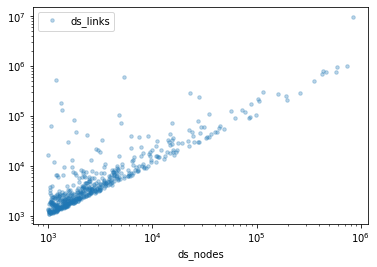

In [4]:
# number of links in the AS
df = analysis_df[["ds_nodes", "ds_links"]]
df.plot(ls="", marker = ".", x="ds_nodes", markersize=7, alpha=.3)
plt.yscale("log")
plt.xscale("log")
plt.savefig(FOLDER + "/links.png", dpi=300)

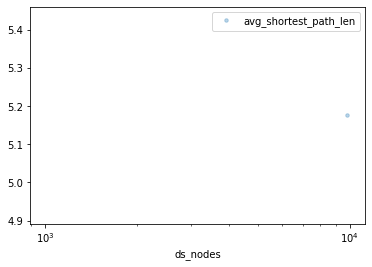

In [5]:
# avg shortest path length
df = analysis_df[["ds_nodes", "avg_shortest_path_len"]]
df.plot(ls="", marker = ".", x="ds_nodes", markersize=7, alpha=.3)
# plt.yscale("log")
plt.xscale("log")
plt.savefig(FOLDER + "/avg_short_path.png", dpi=300)
#TODO numero nodi di lcc

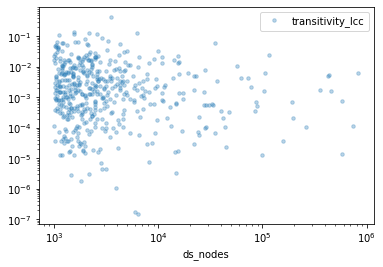

In [7]:
# transitivity
# df = analysis_df[["ds_nodes", "transitivity"]]
# df.plot(ls="", marker = ".", x="ds_nodes", markersize=7, alpha=.3)
# plt.yscale("log")
# plt.xscale("log")
# plt.savefig(FOLDER + "/trans.png", dpi=300)

df = analysis_df[["ds_nodes", "transitivity_lcc"]]
df.plot(ls="", marker = ".", x="ds_nodes", markersize=7, alpha=.3)
plt.yscale("log")
plt.xscale("log")
plt.savefig(FOLDER + "/trans_lcc.png", dpi=300)

# df = analysis_df[["ds_nodes", "transitivity", "transitivity_lcc"]]
# df.plot(ls="", marker = ".", x="ds_nodes", markersize=7, alpha=.3)
# plt.yscale("log")
# plt.xscale("log")
# plt.savefig(FOLDER + "/trans_all.png", dpi=300)

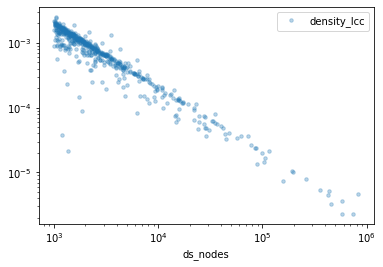

In [8]:
# density
# df = analysis_df[["ds_nodes", "density"]]
# df.plot(ls="", marker = ".", x="ds_nodes", markersize=7, alpha=.3)
# plt.yscale("log")
# plt.xscale("log")
# plt.savefig(FOLDER + "/dens.png", dpi=300)

df = analysis_df[["ds_nodes", "density_lcc"]]
df.plot(ls="", marker = ".", x="ds_nodes", markersize=7, alpha=.3)
plt.yscale("log")
plt.xscale("log")
plt.savefig(FOLDER + "/dens_lcc.png", dpi=300)

# df = analysis_df[["ds_nodes", "density", "density_lcc"]]
# df.plot(ls="", marker = ".", x="ds_nodes", markersize=7, alpha=.1)
# plt.yscale("log")
# plt.xscale("log")
# plt.savefig(FOLDER + "/dens_all.png", dpi=300)

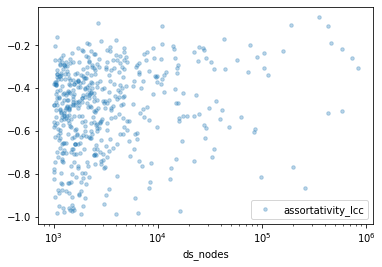

In [9]:
# assortativity
# df = analysis_df[["ds_nodes", "assortativity"]]
# df.plot(ls="", marker = ".", x="ds_nodes", markersize=7, alpha=.3)
# plt.xscale("log")
# plt.savefig(FOLDER + "/ass.png", dpi=300)

df = analysis_df[["ds_nodes", "assortativity_lcc"]]
df.plot(ls="", marker = ".", x="ds_nodes", markersize=7, alpha=.3)
plt.xscale("log")
plt.savefig(FOLDER + "/ass_lcc.png", dpi=300)

# df = analysis_df[["ds_nodes", "assortativity", "assortativity_lcc"]]
# df.plot(ls="", marker = ".", x="ds_nodes", markersize=7, alpha=.3)
# plt.xscale("log")
# plt.savefig(FOLDER + "/ass_all.png", dpi=300)

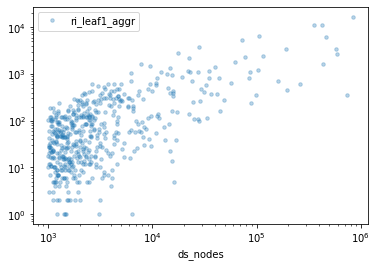

In [10]:
# number of leaf1 aggregators
df = analysis_df[["ds_nodes", "ri_leaf1_aggr"]]
df.plot(ls="", marker = ".", x="ds_nodes", markersize=7, alpha=.3)
plt.yscale("log")
plt.xscale("log")
plt.savefig(FOLDER + "/aggr.png", dpi=300)

# Distributions of statistics over all the ASs

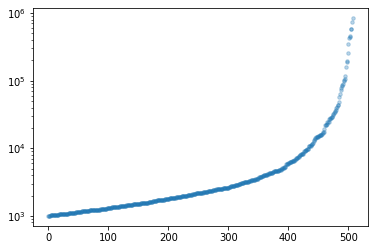

In [11]:
# number of nodes
df = analysis_df["ds_nodes"]
df.plot(ls="", marker = ".", markersize=7, alpha=.3)
plt.yscale("log")
plt.savefig(FOLDER + "/dis_nodes.png", dpi=300)

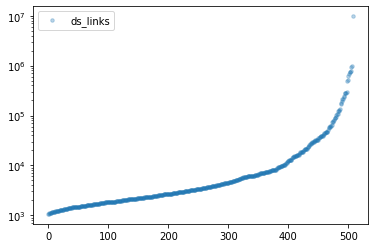

In [12]:
# number of links (both MA and PP)
df = analysis_df["ds_links"].sort_values().reset_index().drop("index", axis=1)
df.plot(ls="", marker = ".", markersize=7, alpha=.3)
plt.yscale("log")
plt.savefig(FOLDER + "/dis_links.png", dpi=300)

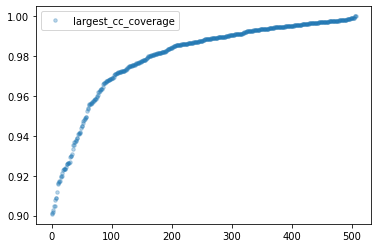

In [13]:
# LCC coverage
df = analysis_df["largest_cc_coverage"].sort_values().reset_index().drop("index", axis=1)
df.plot(ls="", marker = ".", markersize=7, alpha=.3)
plt.savefig(FOLDER + "/dis_lcc_cov.png", dpi=300)

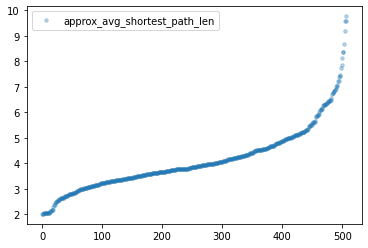

In [17]:
# avg shortest path length
df = analysis_df["approx_avg_shortest_path_len"].sort_values().reset_index().drop("index", axis=1)
df.plot(ls="", marker = ".", markersize=7, alpha=.3)
plt.savefig(FOLDER + "/dis_avg_short_path.png", dpi=300)


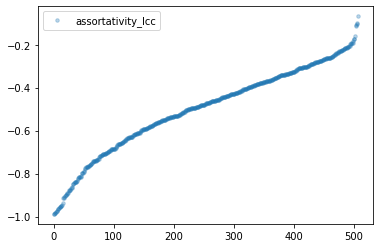

In [15]:
# assortativity
# df = analysis_df["assortativity"].sort_values().reset_index().drop("index", axis=1)
# df.plot(ls="", marker = ".", markersize=7, alpha=.3)
# plt.savefig(FOLDER + "/dis_ass.png", dpi=300)

df = analysis_df["assortativity_lcc"].sort_values().reset_index().drop("index", axis=1)
df.plot(ls="", marker = ".", markersize=7, alpha=.3)
plt.savefig(FOLDER + "/dis_ass_lcc.png", dpi=300)

# df = analysis_df[["assortativity", "assortativity_lcc"]].sort_values(by="assortativity_lcc").reset_index().drop("index", axis=1)
# df.plot(ls="", marker = ".", markersize=7, alpha=.3, title="ranked by LCC")

# df = analysis_df[["assortativity", "assortativity_lcc"]].sort_values(by="assortativity").reset_index().drop("index", axis=1)
# df.plot(ls="", marker = ".", markersize=7, alpha=.3, title="ranked by whole AS")

# Power law

In [19]:
as_count_file = "stats/as_count.csv"
as_df = pd.read_csv(as_count_file).applymap(int)
# smallest as first in list
as_list = as_df["AS_number"].iloc[::-1].tolist()
as_list[:] = list(map(str, as_list))

In [20]:
# blank for image
df = pd.read_csv("data_2020_08/"+as_list[0]+"_nodes_rank.csv")
ax = df.plot(ls="", marker = ".", markersize=7, alpha=0, title="Nodes ranks", legend=False)
# loop over all ASs
for as_num in as_list:
    df = pd.read_csv("data_2020_08/"+as_num+"_nodes_rank.csv")
    df.plot(ls="-", marker = ".", markersize=7, alpha=.5, title="Nodes ranks", ax=ax, legend=False)
plt.yscale("log")
plt.xscale("log")

FileNotFoundError: [Errno 2] No such file or directory: 'data_2020_08/11877_nodes_rank.csv'